# 모델 만들기

## Autograd
- 텐서(Tensor)에서 모든 연산에 대해 자동 미분 순전파(Forward) 그래프에 의해 역전파(Backward) 그래프가 자동으로 정의됩니다!

#### `torch.autograd.grad`를 이용한 기울기 계산

In [3]:
import torch
from torch.autograd import grad

# 1. 텐서 정의, 초기화
x1 = torch.tensor(2., requires_grad=True)
x2 = torch.tensor(3., requires_grad=True)
x3 = torch.tensor(1., requires_grad=True)
x4 = torch.tensor(4., requires_grad=True)

# 2. 수식
z1 = x1 * x2
z2 = x3 * x4
f = z1 + z2

# 3. autograd.grad 기울기 계산
df_dx = grad(outputs=f, inputs=[x1,x2, x3, x4])

# 4. 결과
print(f"gradients : {df_dx}")
print(f"gradients of x1 = {df_dx[0]}")
print(f"gradients of x2 = {df_dx[1]}")
print(f"gradients of x3 = {df_dx[2]}")
print(f"gradients of x4 = {df_dx[3]}")

gradients : (tensor(3.), tensor(2.), tensor(4.), tensor(1.))
gradients of x1 = 3.0
gradients of x2 = 2.0
gradients of x3 = 4.0
gradients of x4 = 1.0


In [17]:
import torch
import torch.optim as optim

# 1. 텐서 정의 및 초기화
x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

# 2. 옵티마이저 설정 (기울기 초기화 기능 포함)


# 3. 수식 정의 및 f.backward() 호출
 # z1 = x1 * x2
 # z2 = x3 * x4
 # f = z1 + z2 = (x1 * x2) + (x3 * x4)

 # 모든 변수의 기울기 자동 계산 및 저장

# 4. 결과 출력
print("Using .backward():")
print(f"Gradient of x1 = {x1.grad}")
print(f"Gradient of x2 = {x2.grad}")
print(f"Gradient of x3 = {x3.grad}")
print(f"Gradient of x4 = {x4.grad}")

Using .backward():
Gradient of x1 = None
Gradient of x2 = None
Gradient of x3 = None
Gradient of x4 = None


In [19]:
### 초기화하지 않는 코드 예시
import torch
import torch.optim as optim

# 1. 텐서 정의 및 초기화
x1 = torch.tensor(2, requires_grad=True, dtype=torch.float16)
x2 = torch.tensor(3, requires_grad=True, dtype=torch.float16)
x3 = torch.tensor(1, requires_grad=True, dtype=torch.float16)
x4 = torch.tensor(4, requires_grad=True, dtype=torch.float16)

# 2. 옵티마이저 설정
opt = optim.SGD(params=[x1, x2, x3, x4], lr=0.001)

# 반복하여 수식 계산 및 기울기 누적
for i in range(3):  # 3번 반복
    # 수식 정의
    z1 = x1 * x2  # z1 = x1 * x2
    z2 = x3 * x4  # z2 = x3 * x4
    f = z1 + z2   # f = z1 + z2 = (x1 * x2) + (x3 * x4)

    # 역전파 수행
    f.backward()  # 기울기 계산 (기존 기울기에 누적)

    # 기울기 출력
    print(f"Iteration {i+1}:")
    print(f"Gradient of x1 = {x1.grad}")
    print(f"Gradient of x2 = {x2.grad}")
    print(f"Gradient of x3 = {x3.grad}")
    print(f"Gradient of x4 = {x4.grad}")
    print()

Iteration 1:
Gradient of x1 = 3.0
Gradient of x2 = 2.0
Gradient of x3 = 4.0
Gradient of x4 = 1.0

Iteration 2:
Gradient of x1 = 6.0
Gradient of x2 = 4.0
Gradient of x3 = 8.0
Gradient of x4 = 2.0

Iteration 3:
Gradient of x1 = 9.0
Gradient of x2 = 6.0
Gradient of x3 = 12.0
Gradient of x4 = 3.0



In [18]:
# backward()

import torch
import torch.optim as optim

# 1. 텐서 정의, 초기화
x1 = torch.tensor(2., requires_grad=True)
x2 = torch.tensor(3., requires_grad=True)
x3 = torch.tensor(1., requires_grad=True)
x4 = torch.tensor(4., requires_grad=True)

opt = optim.SGD(params=[x1, x2, x3, x4], lr = 0.001)        # optimizer 설정
opt.zero_grad()                                             # 기울기 초기화

for i in range(3):
    opt.zero_grad()
    # 2. 수식
    z1 = x1 * x2
    z2 = x3 * x4
    f = z1 + z2

    # 3. backward 기울기 계산 -> 모든 변수의 기울기를 자동으로 계산 + 저장
    f.backward()
    # opt.step()                                            # 파라미터를 업데이트

    # 4. 결과
    print(f"gradients")
    print(f"gradients of x1 = {x1.grad}")
    print(f"gradients of x2 = {x2.grad}")
    print(f"gradients of x3 = {x3.grad}")
    print(f"gradients of x4 = {x4.grad}")

gradients
gradients of x1 = 3.0
gradients of x2 = 2.0
gradients of x3 = 4.0
gradients of x4 = 1.0
gradients
gradients of x1 = 3.0
gradients of x2 = 2.0
gradients of x3 = 4.0
gradients of x4 = 1.0
gradients
gradients of x1 = 3.0
gradients of x2 = 2.0
gradients of x3 = 4.0
gradients of x4 = 1.0


## torch.nn

In [16]:
import torch
import torch.nn as nn                       # neural network

In [20]:
# nn없이 레이어
class FullyConnectedLayer:
    def __init__(self, input_dim, output_dim):
        self.weight = torch.randn(input_dim, output_dim) * 0.01
        self.bias = torch.zeros(output_dim)

    def forward(self, x):
        return x @ self.weight + self.bias

layer = FullyConnectedLayer(8,4)        # 8개의 input -> 4개의 output

x = torch.randn(2, 8)                   # 8개의 input을 가진 데이터가 2개
y = layer.forward(x)
print(y)

tensor([[ 0.0285, -0.0307, -0.0298,  0.0187],
        [ 0.0429,  0.0058, -0.0442,  0.0077]])


In [22]:
# nn을 사용
layer = nn.Linear(in_features=8, out_features=4)
x = torch.randn(2, 8)
y = layer.forward(x)
print(y)

tensor([[ 0.3144, -0.1365,  0.2871,  0.5776],
        [ 0.4926, -0.1321, -0.5247,  0.5632]], grad_fn=<AddmmBackward0>)


In [23]:
relu = nn.ReLU()
softmax = nn.Softmax(dim=1)

In [25]:
x = torch.randn(3, 4)
y = softmax(x)

print(x)
print(y)

tensor([[ 1.3002, -0.4797, -0.9390,  0.3552],
        [-0.2825,  0.3335,  0.7179,  0.1946],
        [ 0.5405,  0.2597, -0.9543,  1.2926]])
tensor([[0.6010, 0.1014, 0.0640, 0.2336],
        [0.1392, 0.2578, 0.3786, 0.2244],
        [0.2438, 0.1842, 0.0547, 0.5173]])


In [27]:
# 손실함수

loss_mse = nn.MSELoss()
loss_ce = nn.CrossEntropyLoss()
loss_bce = nn.BCELoss()

## Tensor의 차원


In [30]:
tensor_0d = torch.tensor(5)
tensor_1d = torch.tensor([1,2,3])
tensor_2d = torch.tensor([[1,2,3],[4,5,6]])
tensor_3d = torch.tensor([[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]]])
tensor_4d = torch.tensor([[[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]]],[[[1,2,3],[4,5,6]],[[1,2,3],[4,5,6]]]])

print(f"0 차원 {tensor_0d.ndim}, size: {tensor_0d.size()}")
print(f"1 차원 {tensor_1d.ndim}, size: {tensor_1d.size()}")
print(f"2 차원 {tensor_2d.ndim}, size: {tensor_2d.size()}")
print(f"3 차원 {tensor_3d.ndim}, size: {tensor_3d.size()}")
print(f"4 차원 {tensor_4d.ndim}, size: {tensor_4d.size()}")


0 차원 0, size: torch.Size([])
1 차원 1, size: torch.Size([3])
2 차원 2, size: torch.Size([2, 3])
3 차원 3, size: torch.Size([2, 2, 3])
4 차원 4, size: torch.Size([2, 2, 2, 3])


In [31]:
# 레이어의 입출력 차원

layer = nn.Linear(in_features=8, out_features=4)
x = torch.randn(1, 8)
y = layer(x)

print(x)
print(y)

tensor([[-0.2907, -1.5389,  0.6562, -0.0303, -0.0775, -0.5863,  0.5544,  0.0660]])
tensor([[-0.4124,  0.7538, -0.6073, -0.4028]], grad_fn=<AddmmBackward0>)


## nn.Module로 모델 만들기

In [32]:
# nn.Module

class Mymodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(8, 4)                           # 8개를 받고 4개노드로
        self.l2 = nn.Linear(4, 6)                           # 4개를 받고 6개노드로
        self.l3 = nn.Linear(6, 3)                           # 6개를 받고 3개의 최종노드로
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        y = self.l3(x)
        return y

In [33]:
model = Mymodel()
input_tensor = torch.randn(2, 8)                            # 배치크기 = 2개 입력차원 = 8개
res = model(input_tensor)

print(input_tensor)                                         # 8개가 입력되었지만
print(res)                                                  # 결과는 3개로 출력되었다.

tensor([[-0.0174, -1.0721, -1.2603, -0.1958, -0.2092,  1.2749, -0.1180, -0.5918],
        [-0.0795, -0.7190, -0.0237, -0.7598, -0.1350,  0.0679,  0.9874,  1.2583]])
tensor([[ 0.5272, -0.3756, -0.2725],
        [ 0.6361, -0.5172, -0.2753]], grad_fn=<AddmmBackward0>)


In [39]:
class Mymodel2(nn.Module):
    def __init__(self):
        super().__init__()
        # self.backbone
        self.block = Mymodel()              # 서브모듈로
        self.layer = nn.Linear(3, 4)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.block(x))        # Mymodel을 통과
        y = self.layer(x)                   # 새로 추가된 layer통과
        return y

In [40]:
model2 = Mymodel2()
imput_tensor = torch.randn(2, 8)            # 배치크기 = 2 입력차원 = 8
res2 = model2(input_tensor)

print(res2)

tensor([[ 0.5417, -0.5100,  0.0719,  0.4142],
        [ 0.5505, -0.5379,  0.0970,  0.4215]], grad_fn=<AddmmBackward0>)


## sequential

레이어가 순차적으로 연결된 모델

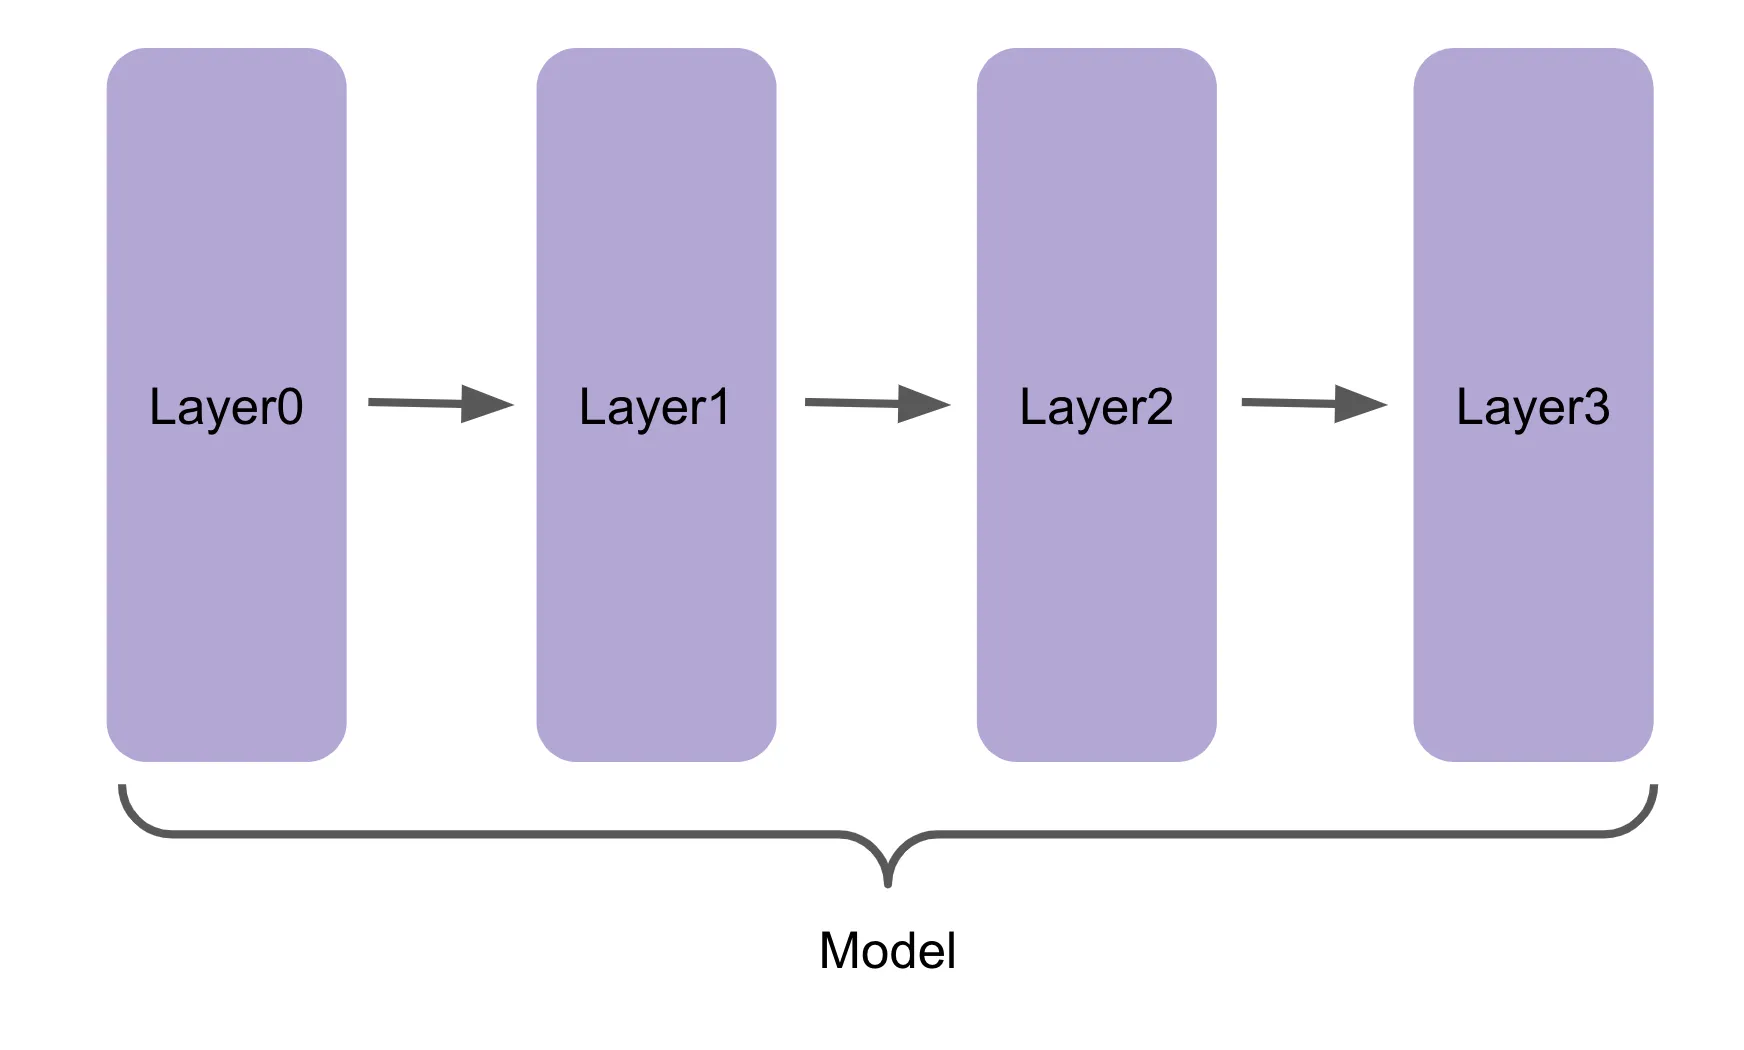

In [38]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(8, 4)                           # 8개를 받고 4개노드로
        self.l2 = nn.Linear(4, 6)                           # 4개를 받고 6개노드로
        self.l3 = nn.Linear(6, 3)                           # 6개를 받고 3개의 최종노드로
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        y = self.l3(x)
        return y

In [43]:
mymodel = MyModel()

model = nn.Sequential(
    nn.Linear(8,4),
    nn.ReLU(),
    nn.Linear(4,6),
    nn.ReLU(),
    nn.Linear(6,3)
)

# model == mymodel()

In [44]:
y = model(input_tensor)
print(y)
y2 = mymodel(input_tensor)
print(y2)

tensor([[-0.3769, -0.1912, -0.1480],
        [-0.3638, -0.1390, -0.1559]], grad_fn=<AddmmBackward0>)
tensor([[-0.4317, -0.3984,  0.0058],
        [-0.5517, -0.2268, -0.0333]], grad_fn=<AddmmBackward0>)


In [54]:
class MyModelSeq(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = nn.Sequential(
                nn.Linear(8,4),
                nn.ReLU(),
                nn.Linear(4,6),
                nn.ReLU(),
                nn.Linear(6,3),
                nn.ReLU()
        )
        self.layer = nn.Linear(3,4)

    def forward(self, x):
        x = self.block(x)
        y = self.layer(x)
        return y

In [55]:
model_seq = MyModelSeq()
y = model_seq(input_tensor)
print(y)

tensor([[ 0.1257,  0.0468,  0.2356, -0.2546],
        [ 0.1404,  0.0690,  0.2212, -0.2438]], grad_fn=<AddmmBackward0>)


In [56]:
class MyModelSeq2(nn.Module):
    def __init__(self):
        super().__init__()
        self.block = nn.Sequential(
                nn.Linear(8,4),
                nn.ReLU(),
                nn.Linear(4,6),
                nn.ReLU(),
                nn.Linear(6,8),
                nn.ReLU()
        )
        self.l1 = nn.Linear(8,3)
        self.layer = nn.Linear(3,4)

    def forward(self, x):
        x = self.block(x)
        x = self.block(x)
        x = self.block(x)
        x = self.block(x)
        x = self.l1(x)
        y = self.layer(x)
        return y

In [57]:
model_seq2 = MyModelSeq2()
y2 = model_seq2(input_tensor)
print(y2)

tensor([[-0.5192, -0.1473, -0.1694,  0.1336],
        [-0.5192, -0.1473, -0.1694,  0.1336]], grad_fn=<AddmmBackward0>)


In [52]:
print(model_seq2)

MyModelSeq2(
  (block): Sequential(
    (0): Linear(in_features=8, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=6, bias=True)
    (3): ReLU()
    (4): Linear(in_features=6, out_features=8, bias=True)
    (5): ReLU()
  )
  (l1): Linear(in_features=8, out_features=3, bias=True)
  (layer): Linear(in_features=3, out_features=4, bias=True)
)


## 복잡한 모델 설계

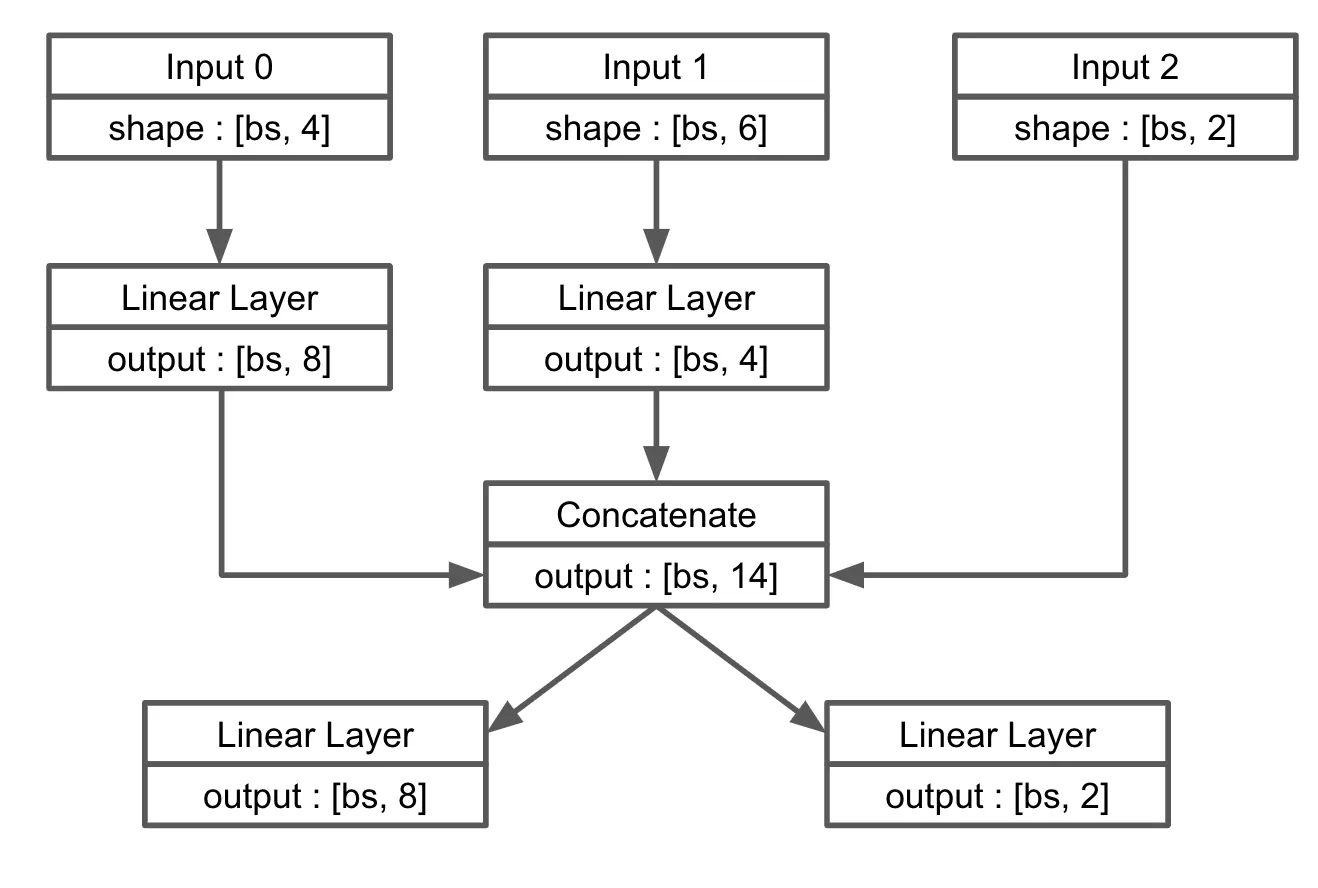

In [58]:
import torch
import torch.nn as nn

class ComplexModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 레이어 정의
        self.l0_0 = nn.Linear(4,8)
        self.l0_1 = nn.Linear(6,4)
        self.l1_0 = nn.Linear(14,8)
        self.l1_1 = nn.Linear(14,2)
        self.relu = nn.ReLU()

    def forward(self, input0, input1, input2):
        # 첫줄
        h0_0 = self.relu(self.l0_0(input0))
        h0_1 = self.relu(self.l0_1(input1))

        # concat
        h1 = torch.cat([h0_0, h0_1, input2], dim=1)

        # 출력
        output0 = self.l1_0(h1)
        output1 = self.l1_1(h1)
        return output0, output1


In [59]:
model = ComplexModel()

# input tensor
bs = 4
x0 = torch.randn(bs, 4)
x1 = torch.randn(bs, 6)
x2 = torch.randn(bs, 2)

In [62]:
y0,y1 = model(x0, x1, x2)

print(y0)
print(y1)
print(y0.size())
print(y1.size())

tensor([[-0.5518, -0.0577, -0.2501,  0.3153, -0.3959,  0.6403,  0.1048, -0.0916],
        [-0.1642, -0.4627,  0.1025,  0.1463,  0.2254,  0.2235, -0.0182, -0.2434],
        [-0.1708, -0.3641, -0.0861,  0.4643, -0.2035,  0.2369,  0.3406, -0.6419],
        [-0.6350, -0.1419,  0.0267,  0.6377, -0.6251,  0.4068,  0.2040, -0.3511]],
       grad_fn=<AddmmBackward0>)
tensor([[-0.7796,  0.3636],
        [-0.0745, -0.0333],
        [-0.4152,  0.3042],
        [-0.3822,  0.3440]], grad_fn=<AddmmBackward0>)
torch.Size([4, 8])
torch.Size([4, 2])


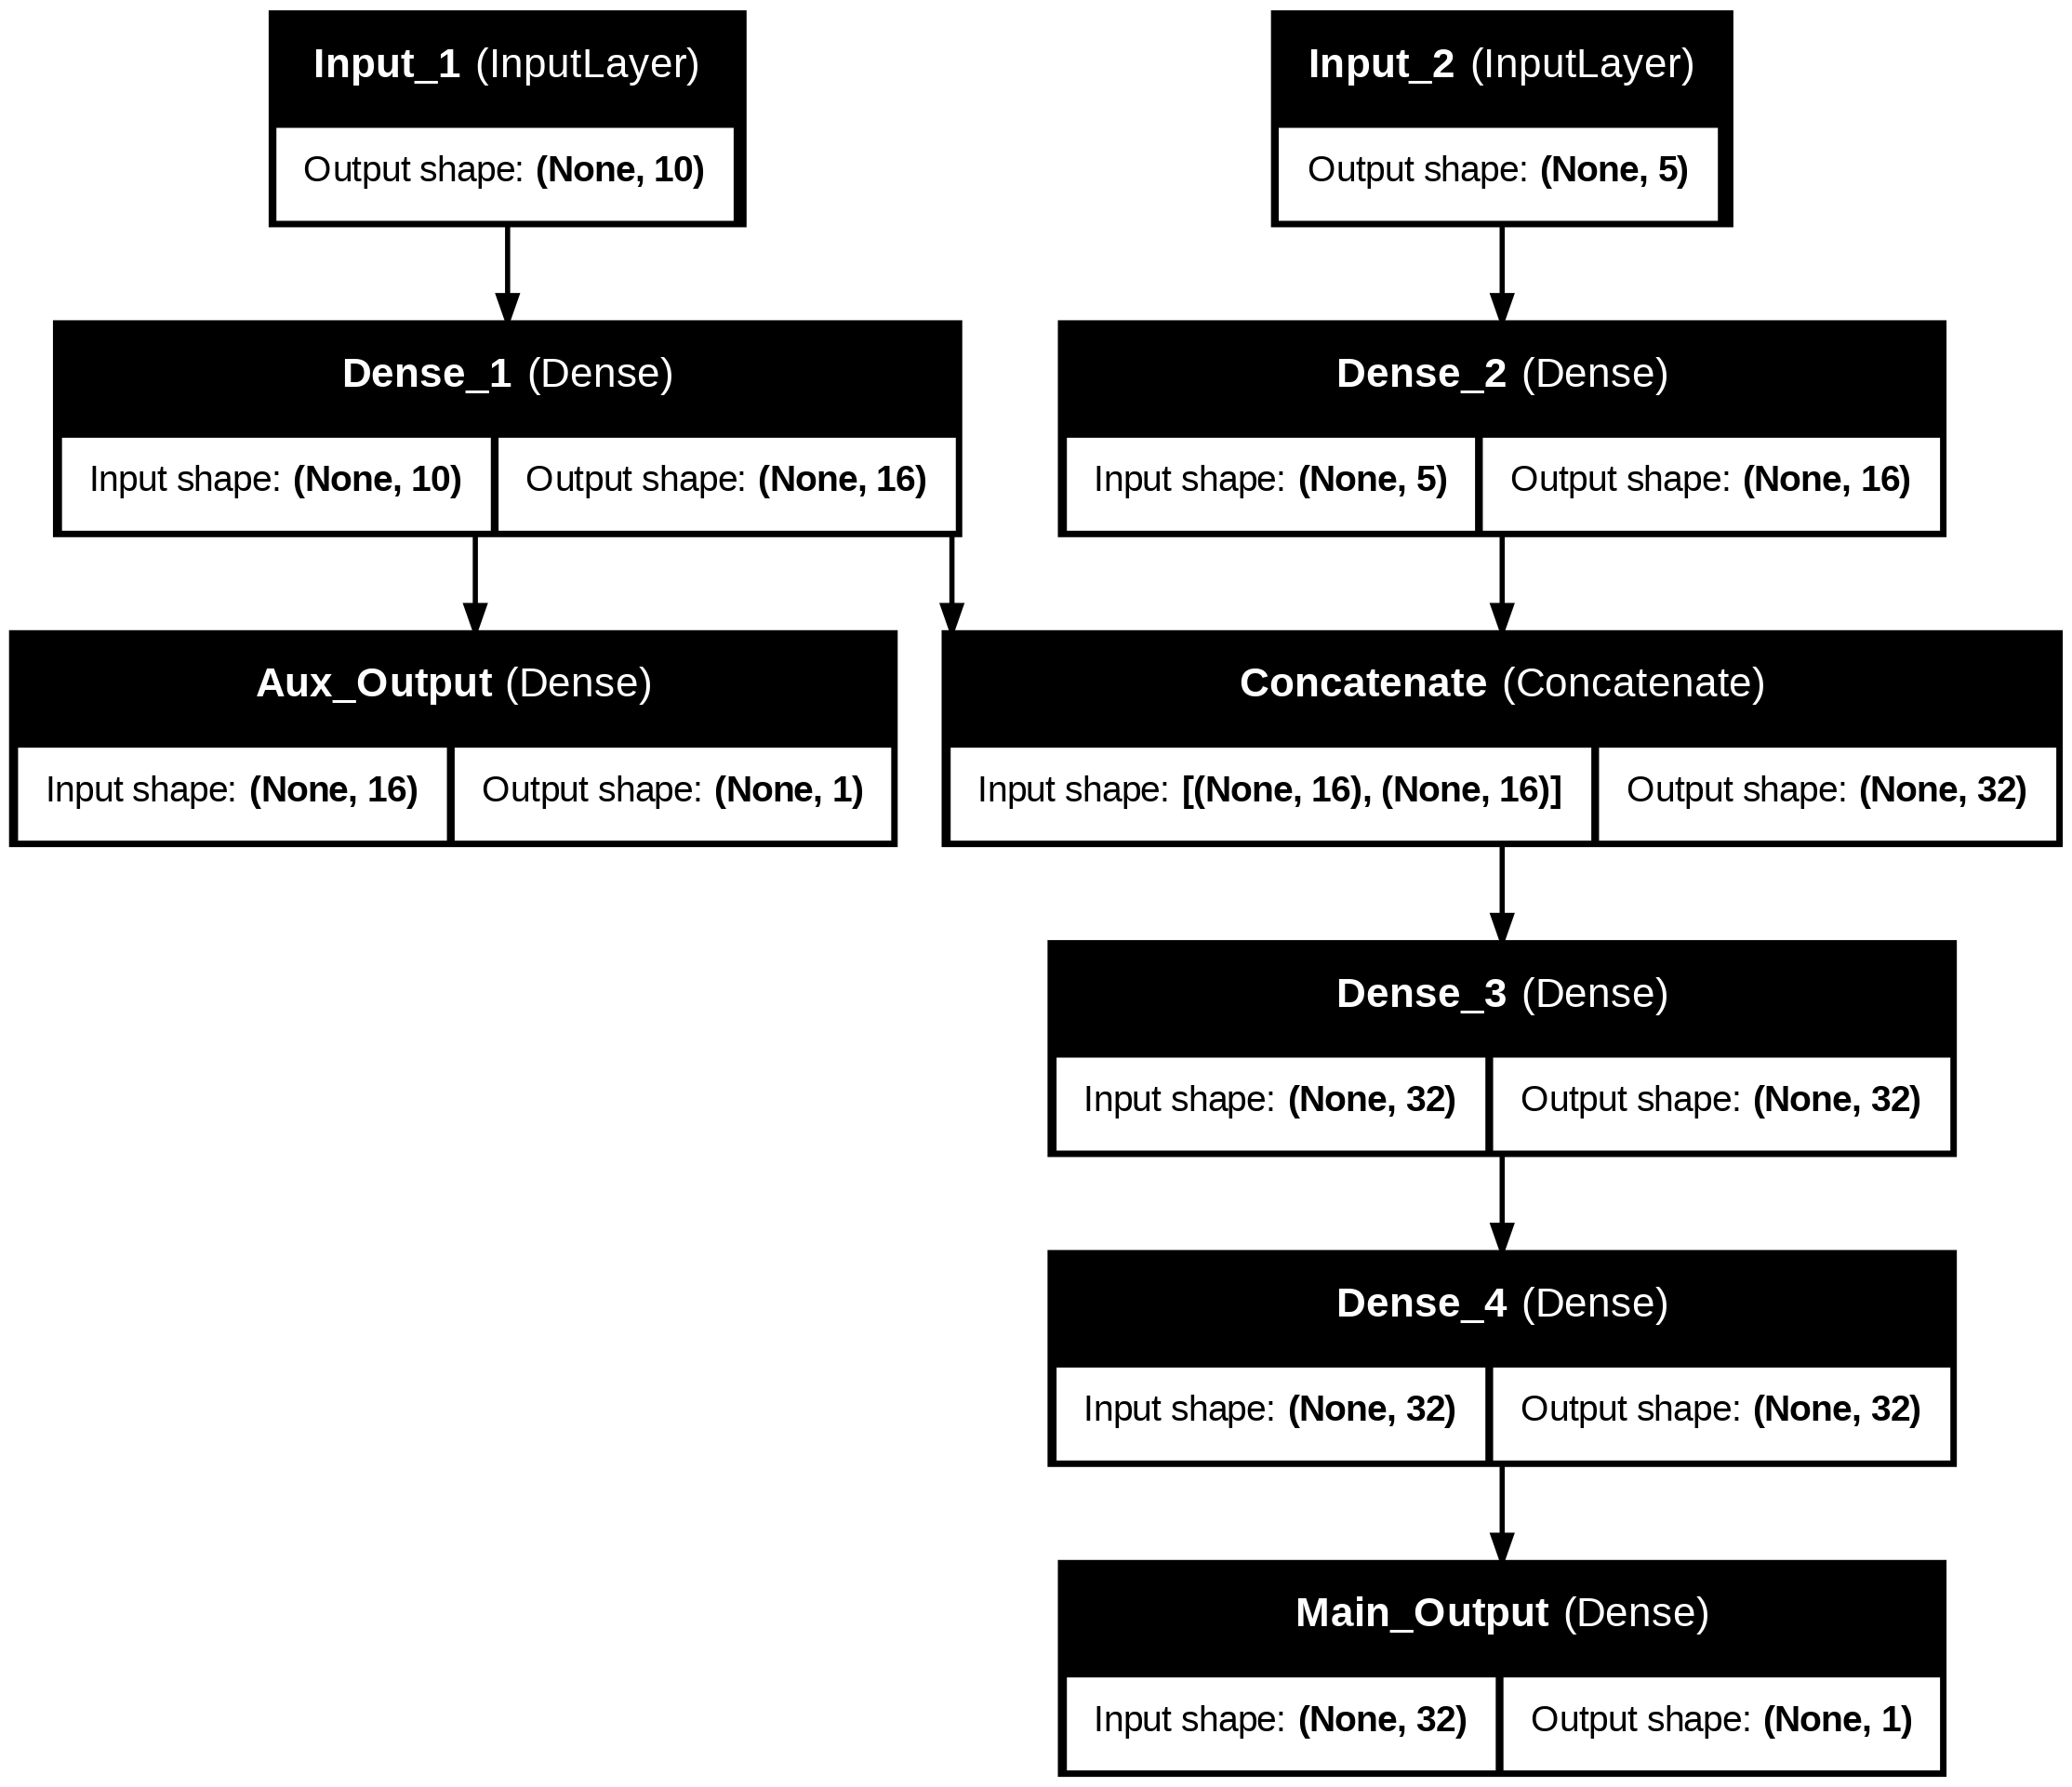

In [68]:
class ComplexModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.dense1 = nn.Linear(10, 16)
        self.dense2 = nn.Linear(5, 16)
        self.dense3 = nn.Linear(32, 32)
        self.dense4 = nn.Linear(32, 32)

        self.relu = nn.ReLU()

        self.aux_output = nn.Linear(16, 1)
        self.main_output = nn.Linear(32, 1)

    def forward(self, input1, input2):
        x1 = self.relu(self.dense1(input1))
        out1 = self.aux_output(x1)

        x2 = self.relu(self.dense2(input2))
        x2 = torch.cat([x1,x2], dim=1)
        x2 = self.relu(self.dense3(x2))
        x2 = self.relu(self.dense4(x2))
        out2 = self.main_output(x2)

        return out1, out2

In [69]:
model = ComplexModel2()

bs = 6
input1 = torch.randn(bs, 10)
input2 = torch.randn(bs, 5)

output1, output2 = model(input1, input2)

print(output1)
print(output2)

tensor([[ 0.1095],
        [ 0.2591],
        [-0.2391],
        [-0.3479],
        [-0.1423],
        [-0.1828]], grad_fn=<AddmmBackward0>)
tensor([[0.0319],
        [0.0431],
        [0.0379],
        [0.0980],
        [0.0390],
        [0.0445]], grad_fn=<AddmmBackward0>)


## 모델 정보 확인하기

In [70]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(8, 4)                           # 8개를 받고 4개노드로
        self.l2 = nn.Linear(4, 6)                           # 4개를 받고 6개노드로
        self.l3 = nn.Linear(6, 3)                           # 6개를 받고 3개의 최종노드로
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        y = self.l3(x)
        return y

model = MyModel()

In [72]:
# 모델 프린트
print(model)

MyModel(
  (l1): Linear(in_features=8, out_features=4, bias=True)
  (l2): Linear(in_features=4, out_features=6, bias=True)
  (l3): Linear(in_features=6, out_features=3, bias=True)
  (relu): ReLU()
)


In [74]:
# 서브 모듈
list(model.children())

[Linear(in_features=8, out_features=4, bias=True),
 Linear(in_features=4, out_features=6, bias=True),
 Linear(in_features=6, out_features=3, bias=True),
 ReLU()]

In [75]:
# 서브 모듈 + 이름
for named_child in model.named_children():
    print(named_child)

('l1', Linear(in_features=8, out_features=4, bias=True))
('l2', Linear(in_features=4, out_features=6, bias=True))
('l3', Linear(in_features=6, out_features=3, bias=True))
('relu', ReLU())


In [76]:
# 파라미터 정보 확인
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 3.3555e-01, -4.1629e-02,  2.2054e-01,  2.2817e-01, -1.4186e-01,
         -1.5385e-02, -9.6719e-03, -1.8678e-01],
        [ 1.2858e-01, -2.8798e-01, -2.3997e-01,  1.9265e-04,  1.7150e-01,
         -3.4052e-01, -1.8080e-01, -6.8369e-02],
        [ 3.1029e-01,  2.2278e-01, -2.3316e-01, -3.1180e-01, -1.4536e-01,
         -1.9374e-01,  1.9770e-01,  2.5966e-01],
        [ 1.4081e-01, -1.8593e-01,  1.4581e-01, -6.7361e-02,  2.6603e-02,
          4.5010e-03,  3.2392e-01,  4.6716e-02]], requires_grad=True)
Parameter containing:
tensor([ 0.1418,  0.3326,  0.0519, -0.3341], requires_grad=True)
Parameter containing:
tensor([[-0.2185,  0.2473, -0.1746, -0.1857],
        [ 0.1286,  0.0754, -0.2689,  0.2846],
        [-0.4571,  0.4361, -0.0728, -0.3231],
        [-0.3559,  0.4635,  0.0264, -0.0644],
        [-0.0521,  0.4056,  0.4306, -0.2220],
        [-0.0834,  0.0519, -0.2657, -0.2864]], requires_grad=True)
Parameter containing:
tensor([-0.0567,  0.1332, -0.2291, -0

In [77]:
# 파라미터 정보 + 이름
for named_param in model.named_parameters():
    print(named_param)

('l1.weight', Parameter containing:
tensor([[ 3.3555e-01, -4.1629e-02,  2.2054e-01,  2.2817e-01, -1.4186e-01,
         -1.5385e-02, -9.6719e-03, -1.8678e-01],
        [ 1.2858e-01, -2.8798e-01, -2.3997e-01,  1.9265e-04,  1.7150e-01,
         -3.4052e-01, -1.8080e-01, -6.8369e-02],
        [ 3.1029e-01,  2.2278e-01, -2.3316e-01, -3.1180e-01, -1.4536e-01,
         -1.9374e-01,  1.9770e-01,  2.5966e-01],
        [ 1.4081e-01, -1.8593e-01,  1.4581e-01, -6.7361e-02,  2.6603e-02,
          4.5010e-03,  3.2392e-01,  4.6716e-02]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.1418,  0.3326,  0.0519, -0.3341], requires_grad=True))
('l2.weight', Parameter containing:
tensor([[-0.2185,  0.2473, -0.1746, -0.1857],
        [ 0.1286,  0.0754, -0.2689,  0.2846],
        [-0.4571,  0.4361, -0.0728, -0.3231],
        [-0.3559,  0.4635,  0.0264, -0.0644],
        [-0.0521,  0.4056,  0.4306, -0.2220],
        [-0.0834,  0.0519, -0.2657, -0.2864]], requires_grad=True))
('l2.bias', Para

In [78]:
class Mymodel2(nn.Module):
    def __init__(self):
        super().__init__()
        # self.backbone
        self.block = Mymodel()              # 서브모듈로
        self.layer = nn.Linear(3, 4)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.block(x))        # Mymodel을 통과
        y = self.layer(x)                   # 새로 추가된 layer통과
        return y

model2 = Mymodel2()

In [79]:
print(model2)

Mymodel2(
  (block): Mymodel(
    (l1): Linear(in_features=8, out_features=4, bias=True)
    (l2): Linear(in_features=4, out_features=6, bias=True)
    (l3): Linear(in_features=6, out_features=3, bias=True)
    (relu): ReLU()
  )
  (layer): Linear(in_features=3, out_features=4, bias=True)
  (relu): ReLU()
)


In [80]:
for named_child2 in model2.named_children():
    print(named_child2)

('block', Mymodel(
  (l1): Linear(in_features=8, out_features=4, bias=True)
  (l2): Linear(in_features=4, out_features=6, bias=True)
  (l3): Linear(in_features=6, out_features=3, bias=True)
  (relu): ReLU()
))
('layer', Linear(in_features=3, out_features=4, bias=True))
('relu', ReLU())


In [81]:
for named_param2 in model2.named_parameters():
    print(named_param2)

('block.l1.weight', Parameter containing:
tensor([[-0.3286,  0.1323, -0.3351,  0.2019, -0.0151,  0.2552,  0.1460, -0.1175],
        [-0.0048,  0.2593, -0.0649,  0.0713, -0.3287,  0.2492, -0.0661, -0.2871],
        [-0.0801,  0.2973, -0.2784, -0.1335, -0.0264, -0.2273,  0.3233,  0.1612],
        [ 0.1925,  0.2276,  0.0671,  0.0163,  0.3053,  0.1630,  0.2287, -0.1261]],
       requires_grad=True))
('block.l1.bias', Parameter containing:
tensor([-0.0048, -0.1096,  0.1153,  0.1020], requires_grad=True))
('block.l2.weight', Parameter containing:
tensor([[-0.4315,  0.0690, -0.3660, -0.2891],
        [ 0.3854, -0.2260, -0.4694,  0.2455],
        [ 0.3167, -0.3193, -0.2999,  0.4823],
        [ 0.4476, -0.0098, -0.0495, -0.3692],
        [-0.2868, -0.1504, -0.1133, -0.0816],
        [ 0.2287, -0.3668,  0.3137,  0.1896]], requires_grad=True))
('block.l2.bias', Parameter containing:
tensor([-0.0683,  0.0032, -0.4334, -0.2315, -0.3677, -0.1084],
       requires_grad=True))
('block.l3.weight', Para

In [82]:
for name, param in model.named_parameters():
    print(f"{name} : {param.device}")

l1.weight : cpu
l1.bias : cpu
l2.weight : cpu
l2.bias : cpu
l3.weight : cpu
l3.bias : cpu


In [83]:
input_tensor = torch.randn(2, 8)
y = model(input_tensor)
print(y)

tensor([[-0.2323, -0.2186,  0.2075],
        [-0.2451, -0.1950,  0.2127]], grad_fn=<AddmmBackward0>)


# 모델 학습하기

In [146]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [147]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [148]:
# 데이터 불러오기
abalone_df = pd.read_csv(
    'https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv',
    names=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
           'Viscera weight', 'Shell weight', 'Age']
)

# 입력과 타깃 나누기
input_data = abalone_df.drop(columns=['Age']).to_numpy().astype(np.float32)
target_data = abalone_df['Age'].to_numpy().astype(np.float32)

In [149]:
# dataset
class AbaloneDataset(Dataset):
    def __init__(self, input_data, target_data):
        self.input_data=input_data
        self.target_data=target_data

    def __len__(self):
        return len(self.input_data)

    def __getitem__(self, index):
        input_tensor = torch.tensor(self.input_data[index], dtype=torch.float32)
        target_tensor = torch.tensor(self.target_data[index], dtype=torch.float32)

        return input_tensor, target_tensor

In [150]:
# 학습/검증/테스트 데이터 분할
train_size = int(len(input_data) * 0.8)
val_size = int(len(input_data) * 0.1)

train_inputs = input_data[:train_size]
train_targets = target_data[:train_size]

val_inputs = input_data[train_size:train_size + val_size]
val_targets = target_data[train_size:train_size + val_size]

test_inputs = input_data[train_size + val_size:]
test_targets = target_data[train_size + val_size:]

In [151]:
# 표준화
scaler = StandardScaler()
scaler.fit(train_inputs)

train_inputs_scaled = scaler.transform(train_inputs)
val_inputs_scaled = scaler.transform(val_inputs)
test_inputs_scaled = scaler.transform(test_inputs)

# 데이터셋 및 데이터로더 생성
train_dataset = AbaloneDataset(train_inputs_scaled, train_targets)
val_dataset = AbaloneDataset(val_inputs_scaled, val_targets)
test_dataset = AbaloneDataset(test_inputs_scaled, test_targets)

train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, drop_last=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=32)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32)

In [154]:
# 모델 정의
# input : 7
# target : 1

class AbaloneModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x


model = AbaloneModel().to(device)
print(model)

AbaloneModel(
  (fc1): Linear(in_features=7, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


In [161]:
import torch.optim as optim

epochs = 10
step = 0
loss_fn = nn.MSELoss()
opt = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 모델 학습
for epoch in range(epochs):
    model.train()
    for train_batch in train_dataloader:
        # x_train, y_train = train_batch
        x_train, y_train = train_batch[0].to(device), train_batch[1].to(device)
        pred = model(x_train).squeeze()                     # 추론 (정답아님)

        # print(pred.size())
        # print(y_train.size())
        # break
        # pred와 y_train 간의 loss 계산
        loss = loss_fn(pred, y_train)
        loss.backward()                                     # 그래드인트 계산

        opt.step()                                          # 파라미터 업데이트
        opt.zero_grad()                                     # 그래디언트 초기화

        step += 1

        if step % 100 ==0:
            print(f"epoch : {epoch}, step : {step}, train loss: {loss.item():.4f}")

#모델 평가
    model.eval()
    with torch.no_grad():
        losses = []
        for val_batch in val_dataloader:
            x_val, y_val =  val_batch[0].to(device), val_batch[1].to(device)
            pred = model(x_val).squeeze()
            loss = loss_fn(pred, y_val)
            losses.append(loss.item())
        val_loss_avg = sum(losses)/len(losses)
        print(f"epoch {epoch+1}/{epoch}, val_loss : {val_loss_avg:.4f}\n")

epoch 1/0, val_loss : 4.2932

epoch : 1, step : 100, train loss: 4.2084
epoch 2/1, val_loss : 3.7669

epoch : 2, step : 200, train loss: 4.5253
epoch 3/2, val_loss : 3.6951

epoch : 3, step : 300, train loss: 4.2992
epoch 4/3, val_loss : 3.8002

epoch : 4, step : 400, train loss: 3.4588
epoch 5/4, val_loss : 3.7943

epoch 6/5, val_loss : 3.9012

epoch : 6, step : 500, train loss: 2.7243
epoch 7/6, val_loss : 3.6858

epoch : 7, step : 600, train loss: 2.6937
epoch 8/7, val_loss : 3.7864

epoch : 8, step : 700, train loss: 5.0344
epoch 9/8, val_loss : 3.6071

epoch : 9, step : 800, train loss: 4.1631
epoch 10/9, val_loss : 3.5911



In [142]:
for name, param in model.named_parameters():
    print(f'{name} : {param.requires_grad}')

fc1.weight : True
fc1.bias : True
fc2.weight : True
fc2.bias : True
fc3.weight : True
fc3.bias : True
fc4.weight : True
fc4.bias : True


In [163]:
# 테스트 데이터 평가
model.eval()
with torch.no_grad():
    losses = []
    for test_batch in test_dataloader:
        x_test, y_test = test_batch[0].to(device), test_batch[1].to(device)
        pred = model(x_test).squeeze()
        loss = loss_fn(pred, y_test)
        losses.append(loss.item())
    test_loss_avg = sum(losses)/len(losses)
    print(f"test loss : {test_loss_avg:.4f}\n")

test loss : 5.0941



In [164]:
# 테스트 데이터 평가
model.eval()
with torch.no_grad():
    losses = []
    preds = []
    targets = []
    for test_batch in test_dataloader:
        x_test, y_test = test_batch[0].to(device), test_batch[1].to(device)
        pred = model(x_test).squeeze()
        loss = loss_fn(pred, y_test)
        losses.append(loss.item())

        preds.extend(pred.cpu().numpy())
        targets.extend(y_test.cpu().numpy())

    test_loss_avg = sum(losses)/len(losses)
    print(f"test loss : {test_loss_avg:.4f}\n")

test loss : 5.0941



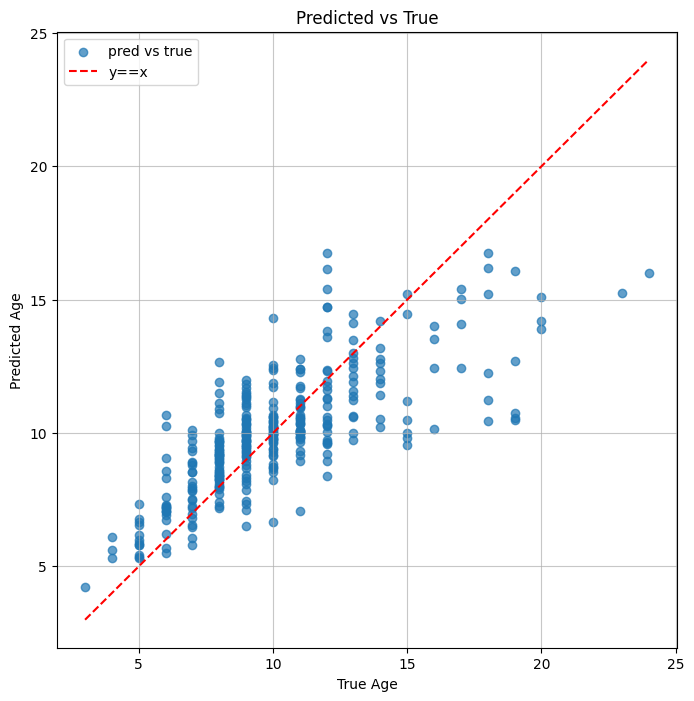

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
plt.scatter(targets, preds, alpha=0.7, label='pred vs true')

min_val = min(min(targets), min(preds))
max_val = max(max(targets), max(preds))
plt.plot([min_val, max_val], [min_val, max_val], "r--", label='y==x')

plt.title('Predicted vs True')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.legend()
plt.grid(alpha=0.7)
plt.show()

## 모델저장


In [169]:
# torch.save()
# state_dict : 모델의 파라미터를 담고있는 dict
torch.save(model.state_dict(), 'model.pth')

In [170]:
state_dict_loaded = torch.load('model.pth')
print(state_dict_loaded)

OrderedDict({'fc1.weight': tensor([[-0.1259, -0.0408,  0.5918,  0.0559,  0.2122,  0.4697, -0.1883],
        [-0.1182,  0.1597, -0.0997, -0.1668, -0.0764, -0.1913, -0.5454],
        [-0.0160, -0.0451,  0.1964,  0.7633, -1.1755, -0.2004,  0.2982],
        [ 0.4590,  0.4344, -0.0613,  0.0364,  0.2109,  0.3798, -0.1440],
        [ 0.2838, -0.3280, -0.1269, -0.1438,  0.0558,  0.2567, -0.4152],
        [-0.1837,  0.0095,  0.2502,  0.5237, -0.6049,  0.1656, -0.3625],
        [-0.0235, -0.2197, -0.1963, -0.0360, -0.8167, -0.0141, -0.0920],
        [ 0.1872,  0.3618,  0.4524,  0.0250,  0.0570,  0.1482, -0.2249],
        [ 0.0768,  0.1187, -0.3850,  0.0338, -0.3347,  0.1704, -0.0249],
        [ 0.1572, -0.5356, -0.2296,  0.1242,  0.0212, -0.4096, -0.2874],
        [-0.2605,  0.2499, -0.0442,  0.0538, -0.2033,  0.0343,  0.2475],
        [ 0.1246,  0.2419,  0.0368,  0.3739, -0.1529,  0.2980,  0.2729],
        [ 0.1223, -0.2761, -0.1597,  0.3274,  0.2382, -0.1003, -0.0325],
        [-0.2782,  0.125

In [175]:
model_loaded = AbaloneModel()

In [176]:
model_loaded.load_state_dict(state_dict_loaded)

<All keys matched successfully>

In [177]:
model_loaded.state_dict()

OrderedDict([('fc1.weight',
              tensor([[-0.1259, -0.0408,  0.5918,  0.0559,  0.2122,  0.4697, -0.1883],
                      [-0.1182,  0.1597, -0.0997, -0.1668, -0.0764, -0.1913, -0.5454],
                      [-0.0160, -0.0451,  0.1964,  0.7633, -1.1755, -0.2004,  0.2982],
                      [ 0.4590,  0.4344, -0.0613,  0.0364,  0.2109,  0.3798, -0.1440],
                      [ 0.2838, -0.3280, -0.1269, -0.1438,  0.0558,  0.2567, -0.4152],
                      [-0.1837,  0.0095,  0.2502,  0.5237, -0.6049,  0.1656, -0.3625],
                      [-0.0235, -0.2197, -0.1963, -0.0360, -0.8167, -0.0141, -0.0920],
                      [ 0.1872,  0.3618,  0.4524,  0.0250,  0.0570,  0.1482, -0.2249],
                      [ 0.0768,  0.1187, -0.3850,  0.0338, -0.3347,  0.1704, -0.0249],
                      [ 0.1572, -0.5356, -0.2296,  0.1242,  0.0212, -0.4096, -0.2874],
                      [-0.2605,  0.2499, -0.0442,  0.0538, -0.2033,  0.0343,  0.2475],
               

In [183]:
import torch.optim as optim

epochs = 10
step = 0
loss_fn = nn.MSELoss()
opt = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 모델 학습
for epoch in range(epochs):
    model.train()
    for train_batch in train_dataloader:
        # x_train, y_train = train_batch
        x_train, y_train = train_batch[0].to(device), train_batch[1].to(device)
        pred = model(x_train).squeeze()                     # 추론 (정답아님)

        # print(pred.size())
        # print(y_train.size())
        # break
        # pred와 y_train 간의 loss 계산
        loss = loss_fn(pred, y_train)
        loss.backward()                                     # 그래드인트 계산

        opt.step()                                          # 파라미터 업데이트
        opt.zero_grad()                                     # 그래디언트 초기화

        step += 1

        if step % 100 ==0:
            print(f"epoch : {epoch}, step : {step}, train loss: {loss.item():.4f}")

#모델 평가
    model.eval()
    with torch.no_grad():
        losses = []
        for val_batch in val_dataloader:
            x_val, y_val =  val_batch[0].to(device), val_batch[1].to(device)
            pred = model(x_val).squeeze()
            loss = loss_fn(pred, y_val)
            losses.append(loss.item())
        val_loss_avg = sum(losses)/len(losses)
        print(f"epoch {epoch+1}/{epoch}, val_loss : {val_loss_avg:.4f}\n")

    if epoch % 10 == 0:
        torch.save(model.state_dict(), "model.pt")

    torch.save(model.state_dict(),f'model_{epoch+1}.pt')

epoch 1/0, val_loss : 3.5879

epoch : 1, step : 100, train loss: 4.8209
epoch 2/1, val_loss : 3.6743

epoch : 2, step : 200, train loss: 4.6425
epoch 3/2, val_loss : 3.6023

epoch : 3, step : 300, train loss: 1.7141
epoch 4/3, val_loss : 3.7989

epoch : 4, step : 400, train loss: 5.1036
epoch 5/4, val_loss : 3.8337

epoch 6/5, val_loss : 3.6476

epoch : 6, step : 500, train loss: 3.4907
epoch 7/6, val_loss : 3.6390

epoch : 7, step : 600, train loss: 13.9862
epoch 8/7, val_loss : 3.9841

epoch : 8, step : 700, train loss: 3.1002
epoch 9/8, val_loss : 3.6271

epoch : 9, step : 800, train loss: 3.9418
epoch 10/9, val_loss : 3.6510



In [184]:
import torch.nn.functional as F
import torch.nn as nn

In [185]:
y = F.relu(x)
relu = nn.ReLU()

# maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
# y = maxpool(x)

In [186]:
y = F.relu(x)
y = F.max_pool2d(x, kernel_size=2, stride=2)

RuntimeError: non-empty 3D or 4D (batch mode) tensor expected for input

In [ ]:
class AbaloneModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
loss_fn = nn.MSELoss()
loss = loss_fn(pred, y_train)

F.mse_loss(pred, y_train)

In [189]:
# in-place 메소드
x = torch.ones(1, 4)
x_sq = x.squeeze()
print(x.size())
print(x_sq.size())

x.squeeze_()
print(x.size())

torch.Size([1, 4])
torch.Size([4])
torch.Size([4])
